# Logistic Regression Analysis on Bank Personal Loan Prediction Case Study

### 2.2 Dataset Loading

In [1]:
#Import the necessary libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Dataset is read 
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Observations:<br>

#### Categorical Feature:
> Family<br>
> Education<br>
> ID<br>
> Zip Code<br>
> Securities Account<br>
> CD Account<br>
> Online<br>
> Credit Card<br>

#### Numerical feature:¶
> Age<br>
> Experience<br>
> Income<br>
> CCAvg<br>
> Mortage<br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation:<br>
No missing values found. 

In [4]:
df.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


#### Observation:
No Null/NA values found.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation:<br>
The 'Experience' Feature has negative values

In [6]:
#Negative value treatment

#Check if it is true when there are any negative values in experience column
any(df['Experience'] < 0)

True

In [7]:
#Replacing the negative values with the mean value of the column
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [8]:
#check if it is true when there are any negative values still in experience column after replacing.
any(df['Experience'] < 0)

False

In [9]:
#Now have a look again on descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### 2.3 Exploratory Data analysis

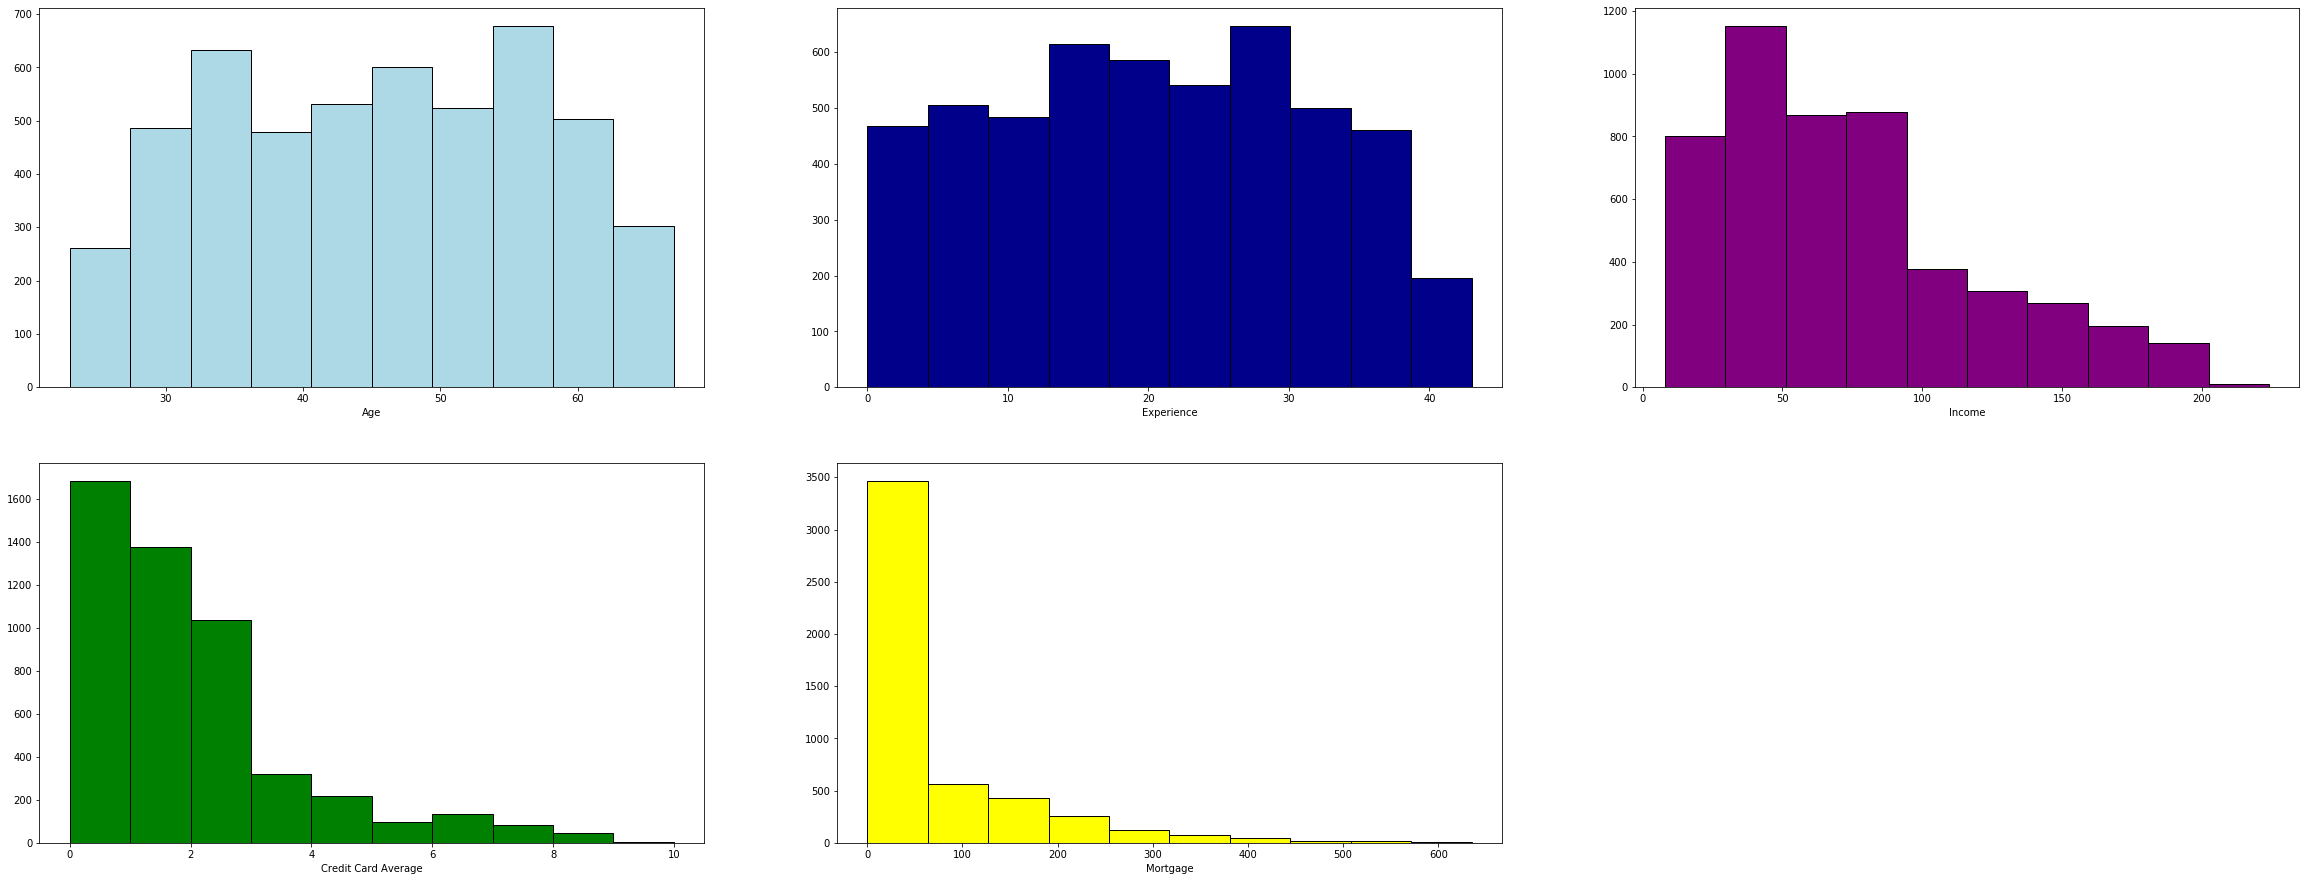

In [10]:
#checking how the age, experience, income and mortgage columns are distributed

plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

#### Observation:<br>
> 1. Age & Experience seems to be quiet normally distributed.<br>
> 2. Income, CC Average & Mortgage are highly skewed.

In [11]:
Skewness = pd.DataFrame({'Skewness' : [df.Age.skew(),df.Experience.skew(),df.Income.skew(),df.CCAvg.skew()
                                      ,df.Mortgage.skew()]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029341
Experience,-0.014100
Income,0.841339
CCAvg,1.598457
Mortgage,2.104002


#### Observation:<br>
> 1. Age and Experience seems to be quiet Symmetrical
> 2. Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values

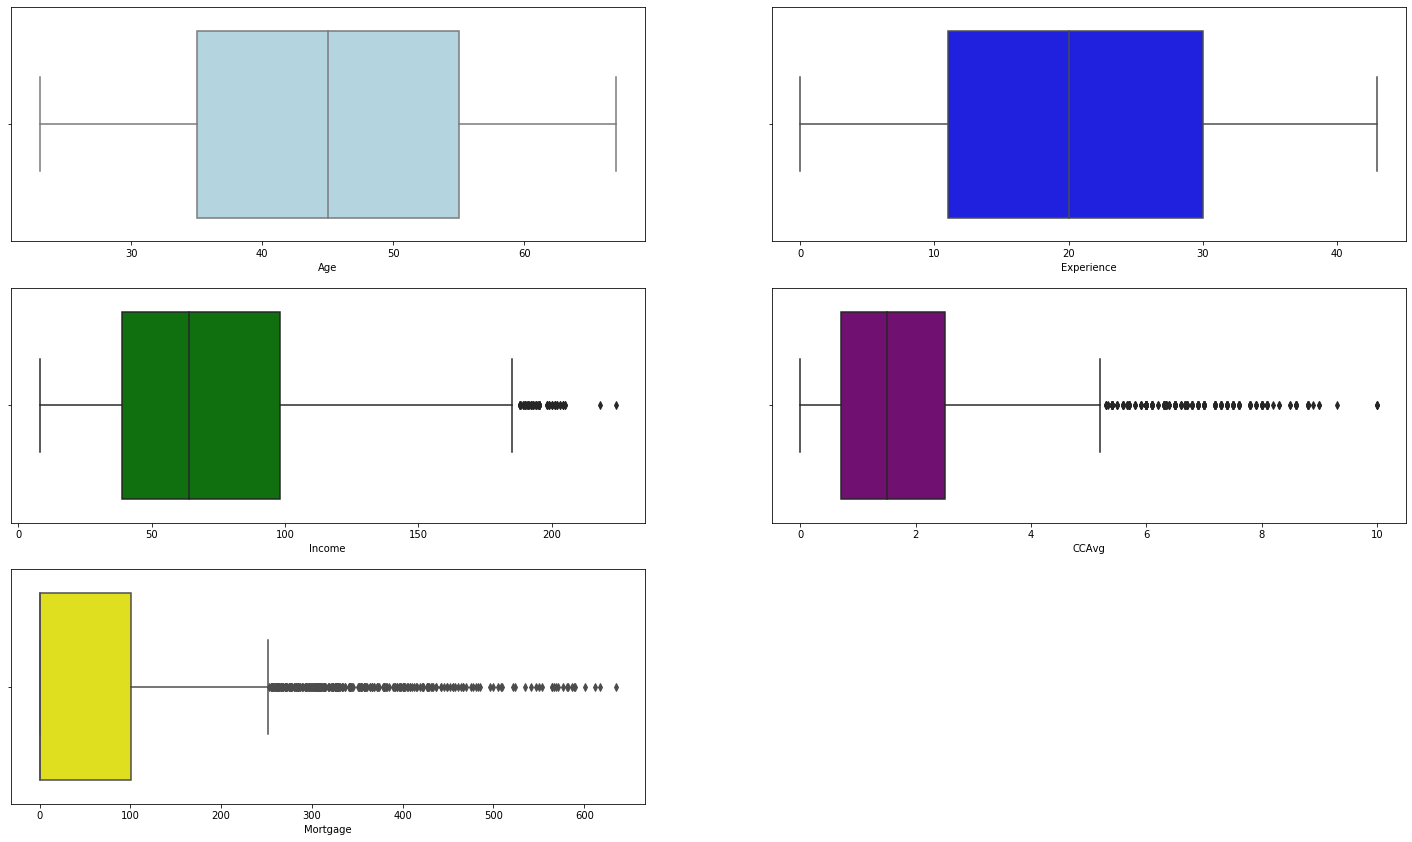

In [12]:
#Checking if there are any outliers present in dataset through boxplot
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow')

#### Observations:<br>
1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.
2. Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.
3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

Text(0.5, 1.0, 'Credit Card Distribution')

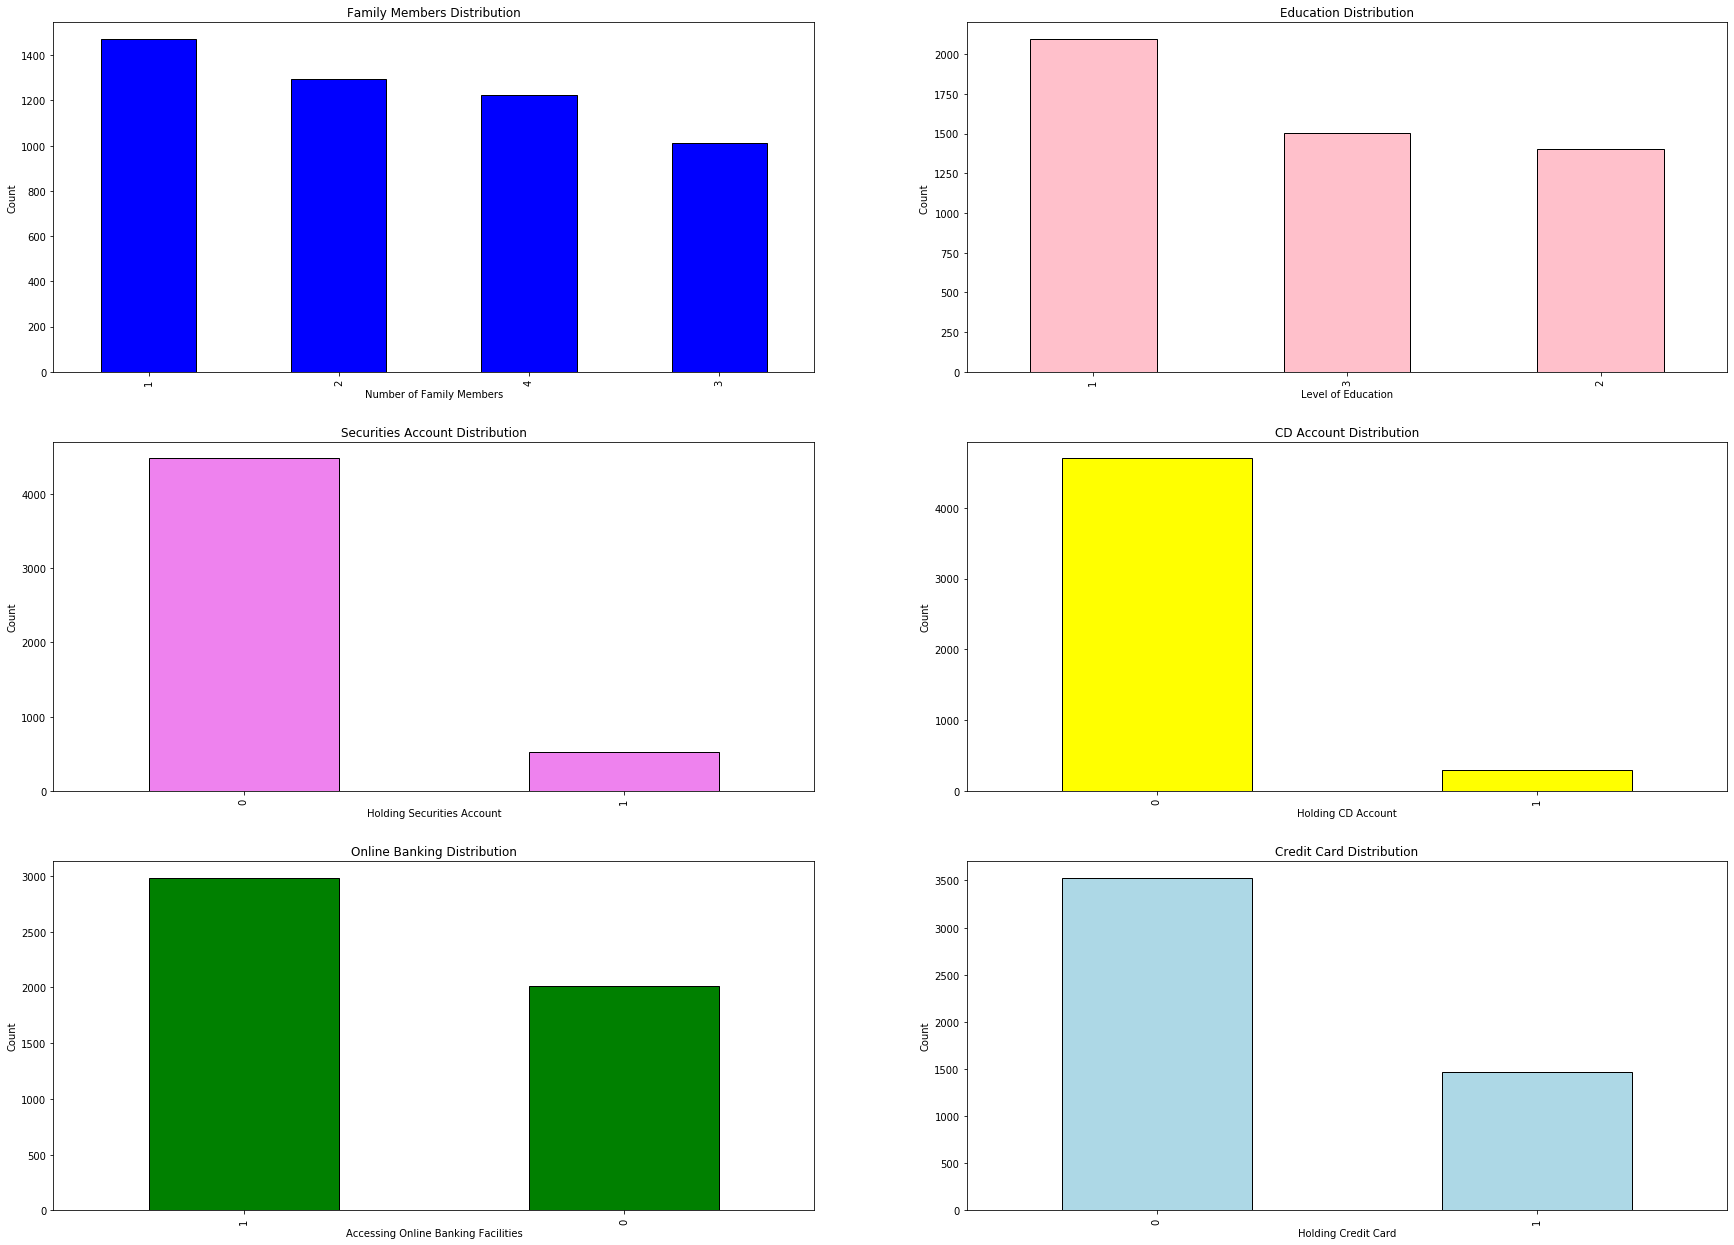

In [13]:
#Categorical variable can be visualized by count plot
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

#### Observations:<br>
1. The distribution of families is evenly distributed.
2. From the above plots, we can say a vast difference is visible in Securities Account and CD Account columns. This might be due to not holding the Securities Account and CD Accounts by many of the customers. 

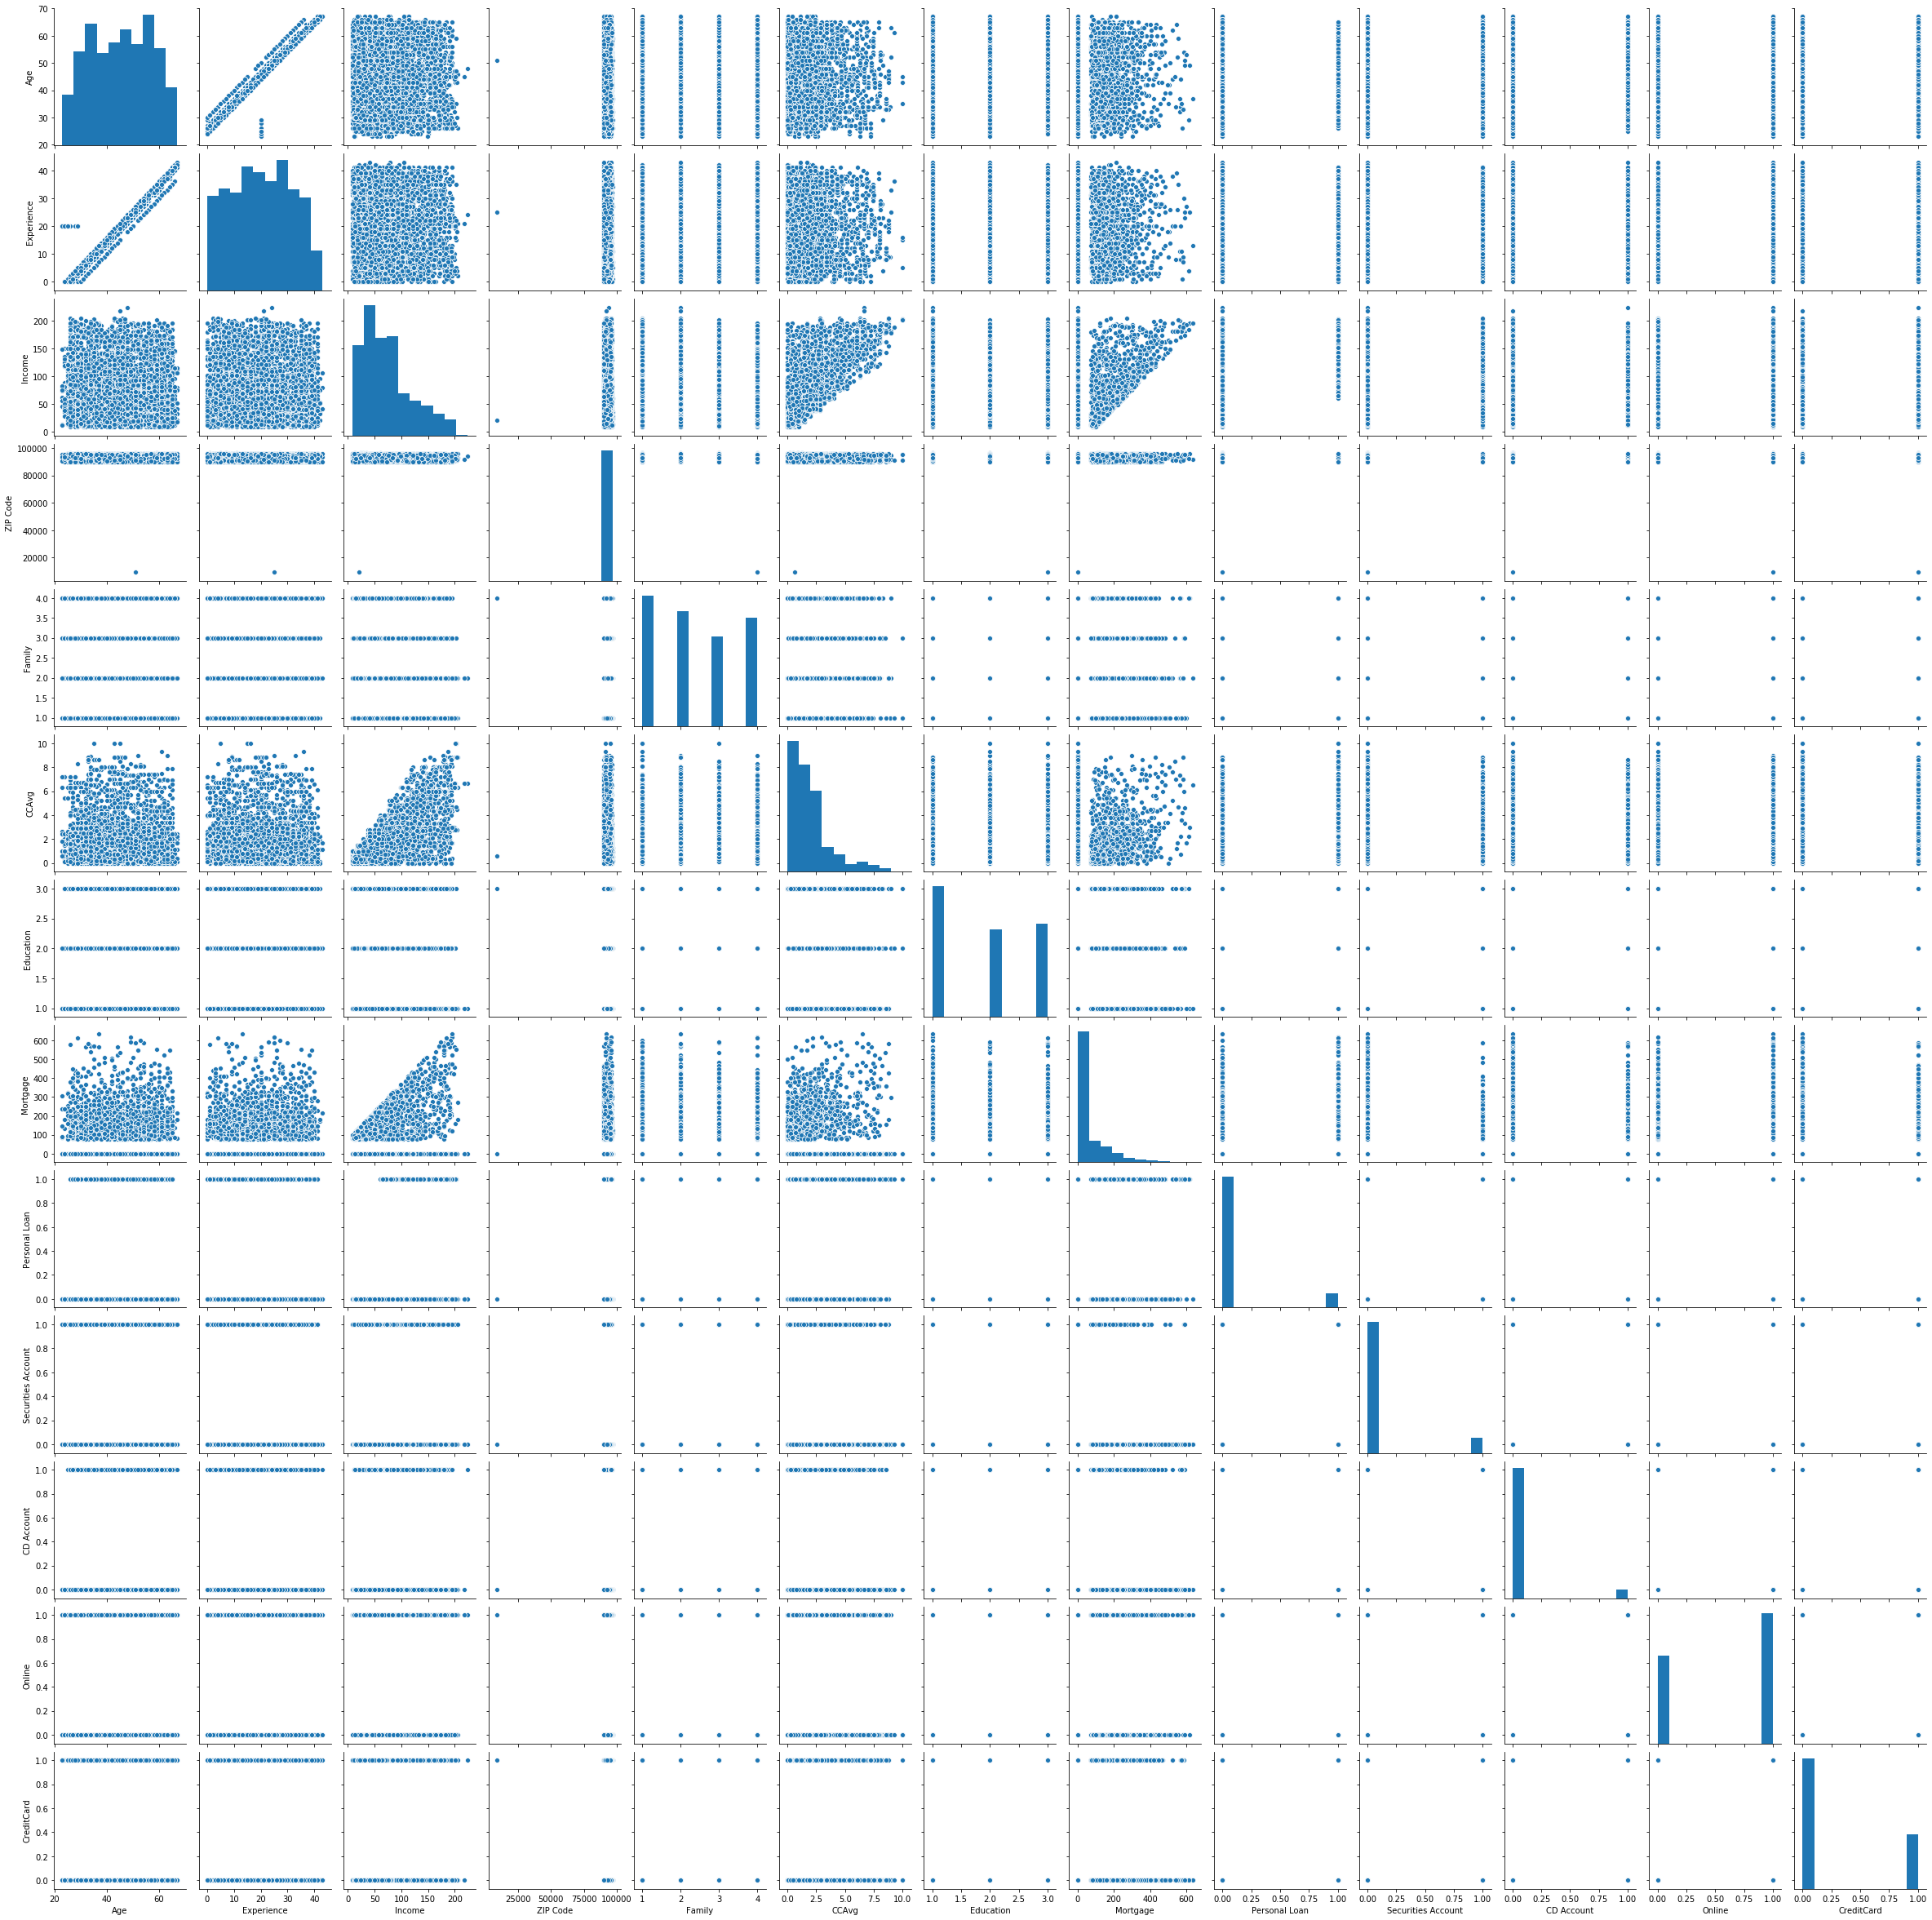

In [14]:
#Pairplot between the varibles excluding ID column
sns.pairplot(df.iloc[:,1:])

#### Observation:<br>
We can say from the above pair plot that age and experience columns are highly correlated 

In [15]:
#To check how many customers are eligible for loan and how many are not using value_counts() and store it in a dataframe
df['Personal Loan'].value_counts().to_frame()

,Personal Loan
0,4520
1,480


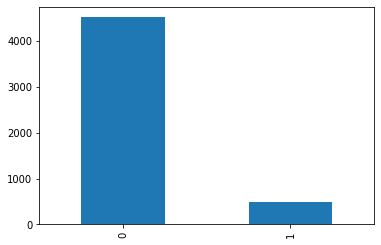

In [16]:
#Plotting the histogram for personal loan feature
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

#### Observation:<br>
It seems like many of the customers are not eligible for personal loan

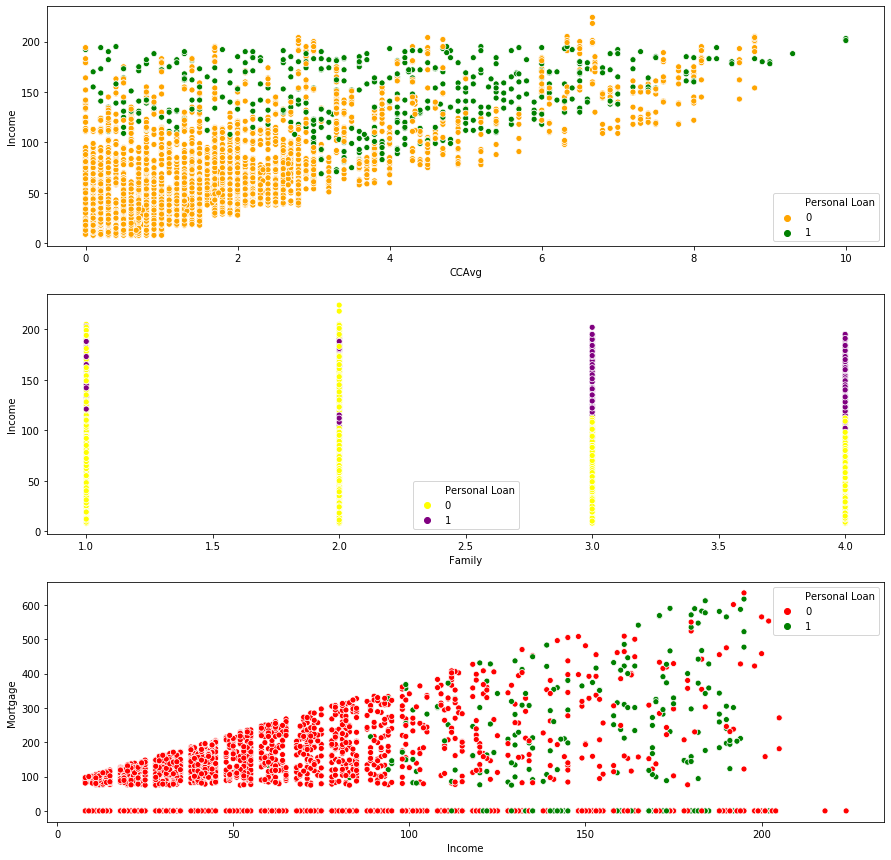

In [17]:
#checking how personal loan is influencing on CCAvg, Family and Income features through scatter plot
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['orange','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['yellow','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['red','green'])

#### Observations:<br>
1. From the first graph, Customers having high income and having a personal loan has high Credit Card average
2. From second graph, it is clear that as family size of customers increases, the need of personal loan is also increasing.
3. From third graph, It is very precise that as the income increases (from 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

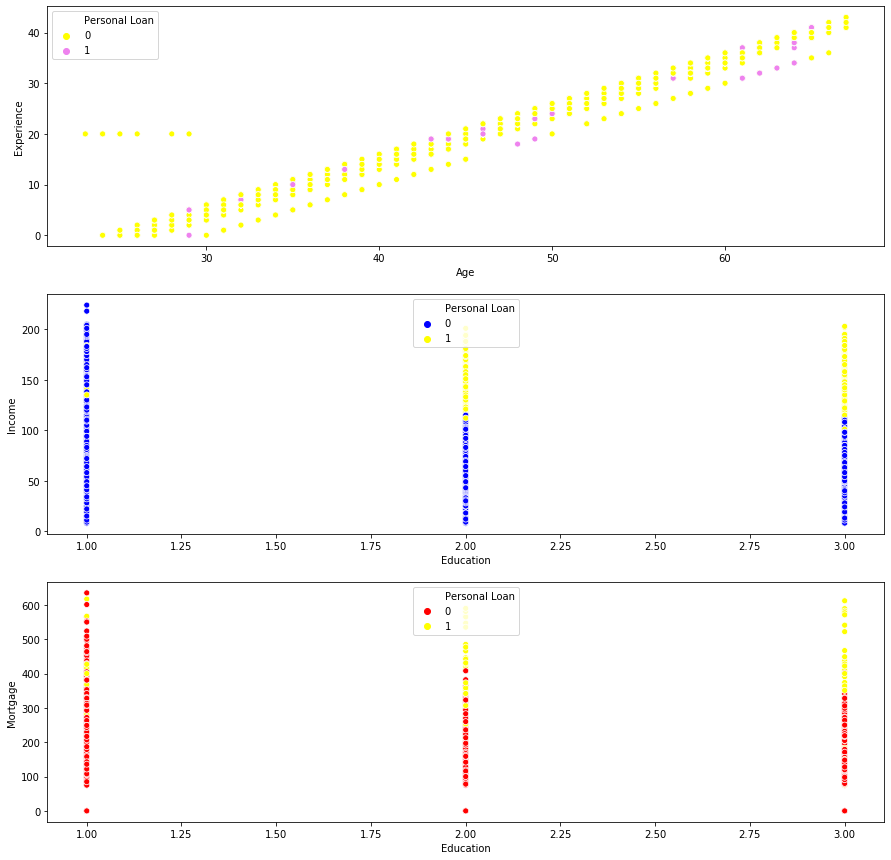

In [18]:
#Checking how personal loan is influencing education, experience and age of customers
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

#### Observations:<br>
1. From the first graph, it is clear that even though age has high association with experience(almost a straight line) of customers, it has nothing to do with personal loan attribute
2. From the second graph, it is clear that customers with education level of 1 has high income and it is approximately equal to customers who had taken loan
3. From the thrid graph, it is clear that customers with education level of 2 and 3 might take personal loan as they have high mortgage.

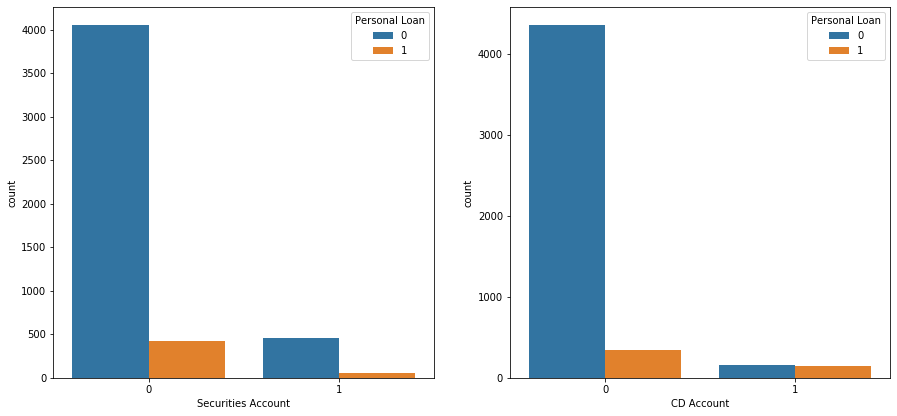

In [19]:
#check how personal loan is influencing the securities and CD accounts
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

#### Observations:<br>
1. Customers who dont have loan holds securities account and who had taken loan hold very few securities accounts
2. From the above graph, it can be observed that customers who dont have loan dont hold CD accounts and who have loan almost all of them have CD accounts.

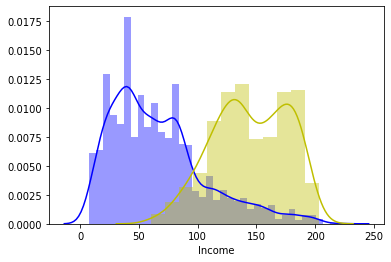

In [20]:
#Check if personal loan has influence on income of customers
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y')

#### Observations:<br>
From the above graph, the customers who has taken personal loan also have high income

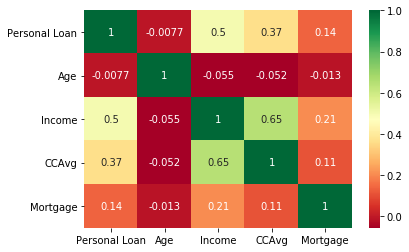

In [21]:
#Checking for correlation through heatmap
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True, cmap='RdYlGn')

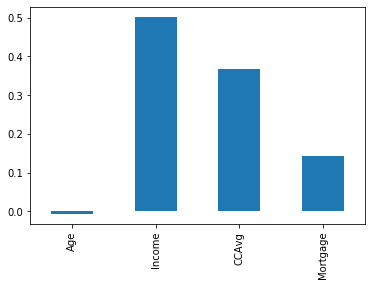

In [22]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

#### Observations:<br>
1. From the above graphs, it is clearly visible that Income, CCAvg and Mortgage has correlation with Personal loan.
2. Income, CCAvg are highly corrleated with Personal loan

## 3. Building the model

In [23]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.drop(['ID','ZIP Code'], inplace=True, axis=1)

In [25]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [26]:
#Assign the variables
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

#Split the data 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Build the model
logitModel = LogisticRegression()

#Fit the model with training data
logitModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. Testing and Performance Evaluation

In [27]:
#test the above model with test data
y_pred = logitModel.predict(X_test)

In [28]:
#printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1342
           1       0.73      0.49      0.59       158

    accuracy                           0.93      1500
   macro avg       0.84      0.74      0.77      1500
weighted avg       0.92      0.93      0.92      1500



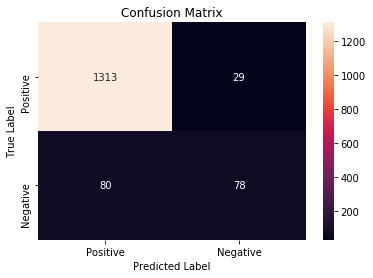

In [29]:
#printing the classification report through heatmap
cm = confusion_matrix(y_test, y_pred)

#
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 5. Conclusions and Recommendations

Inference from Logistic Regression
Age, Experience, Mortgage has p value more than 0.05 ie, these are Not Significantly Important
All Other Attributes has p value less than 0.05 ie, they are Significantly Important .
Out of all these variables,Income, Family, Education, CD Account, Online and Credit Card are Most Significant
The regression equation is -
Personal Loan = -12.19 - 0.054(Age) + 0.064(Experience) + 0.0548(Income) + 0.69(Family) + 0.12(CCAvg) + 1.73(Education) + 0.0005(Mortgage) - 0.94(Securities Account) + 3.82(CD Account) - 0.67(Online) - 1.12(CreditCard)